In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|\#', '', text)
    
    # Remove punctuations and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoin tokens
    text = ' '.join(tokens)
    
    return text

# Apply preprocessing
df['processed_text'] = df['review'].apply(preprocess_text)

# Display some processed examples
print(df[['review', 'processed_text']].head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      processed_text  
0  one reviewer mentioned watching 1 oz episode y...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [8]:
df.head()

,review,sentiment,processed_text
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode y...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [9]:
#Encoding label
from sklearn.preprocessing import LabelEncoder

# Fit label encoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment,processed_text,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode y...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1


In [10]:
# Split the data into train and temp(validation+test)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(
    df['processed_text'], df['sentiment_encoded'], test_size=0.3, random_state=42, stratify=df['sentiment']
)
# Split the temp data into test and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 35000
Validation set size: 7500
Test set size: 7500


In [12]:
#pip install torch transformers

In [13]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer and model
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,  # Assuming 2 sentiment classes (positive, negative)
    output_attentions=False,
    output_hidden_states=False,
)
model.to(device)

# Tokenize data
def tokenize_data(texts, labels, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels.values, dtype=torch.long)
    
    return input_ids, attention_masks, labels

# Tokenize train, validation, and test data
train_inputs, train_masks, train_labels = tokenize_data(X_train, y_train, tokenizer)
val_inputs, val_masks, val_labels = tokenize_data(X_val, y_val, tokenizer)
test_inputs, test_masks, test_labels = tokenize_data(X_test, y_test, tokenizer)

# Create DataLoaders
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

2025-04-21 10:37:59.717303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745231879.739437      99 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745231879.746213      99 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using device: cuda


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from tqdm import tqdm

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Training function
def train_model(model, train_dataloader, val_dataloader, epochs, optimizer, scheduler, device):
    # Store training and validation loss, accuracy
    training_stats = []
    
    # For each epoch
    for epoch in range(epochs):
        print(f"\n======== Epoch {epoch + 1} / {epochs} ========")
        print("Training...")
        
        # Reset total loss for this epoch
        total_train_loss = 0
        model.train()
        
        # Training loop
        for batch in tqdm(train_dataloader):
            # Unpack the batch and move to device
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            
            # Clear gradients
            model.zero_grad()
            
            # Forward pass
            outputs = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask,
                labels=b_labels
            )
            
            loss = outputs.loss
            total_train_loss += loss.item()
            
            # Backward pass
            loss.backward()
            
            # Clip gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            
            # Update parameters
            optimizer.step()
            
            # Update learning rate
            scheduler.step()
        
        # Calculate average loss over all batches
        avg_train_loss = total_train_loss / len(train_dataloader)
        print(f"Average training loss: {avg_train_loss:.4f}")
        
        # Validation
        print("Running Validation...")
        model.eval()
        
        total_val_loss = 0
        all_preds = []
        all_labels = []
        
        # Validation loop
        for batch in tqdm(val_dataloader):
            # Unpack the batch and move to device
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            
            # No gradient calculation needed
            with torch.no_grad():
                # Forward pass
                outputs = model(
                    b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels
                )
                
                loss = outputs.loss
                logits = outputs.logits
                
                total_val_loss += loss.item()
                
                # Move logits and labels to CPU
                logits = logits.detach().cpu().numpy()
                label_ids = b_labels.to('cpu').numpy()
                
                # Store predictions and true labels
                preds = np.argmax(logits, axis=1)
                all_preds.extend(preds)
                all_labels.extend(label_ids)
        
        # Calculate average validation loss
        avg_val_loss = total_val_loss / len(val_dataloader)
        
        # Calculate validation accuracy
        val_accuracy = accuracy_score(all_labels, all_preds)
        
        print(f"Validation Loss: {avg_val_loss:.4f}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        
        # Store stats
        training_stats.append({
            'epoch': epoch + 1,
            'train_loss': avg_train_loss,
            'val_loss': avg_val_loss,
            'val_accuracy': val_accuracy
        })
    
    return training_stats

# Train the model
training_stats = train_model(model, train_dataloader, val_dataloader, epochs, optimizer, scheduler, device)


======== Epoch 1 / 10 ========
Training...


100%|██████████| 2188/2188 [13:13<00:00,  2.76it/s]


Average training loss: 0.3356
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.87it/s]


Validation Loss: 0.2754
Validation Accuracy: 0.8937

======== Epoch 2 / 10 ========
Training...


100%|██████████| 2188/2188 [13:15<00:00,  2.75it/s]


Average training loss: 0.2426
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.90it/s]


Validation Loss: 0.3663
Validation Accuracy: 0.8980

======== Epoch 3 / 10 ========
Training...


100%|██████████| 2188/2188 [13:15<00:00,  2.75it/s]


Average training loss: 0.1915
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.87it/s]


Validation Loss: 0.4005
Validation Accuracy: 0.8981

======== Epoch 4 / 10 ========
Training...


100%|██████████| 2188/2188 [13:16<00:00,  2.75it/s]


Average training loss: 0.1458
Running Validation...


100%|██████████| 469/469 [00:53<00:00,  8.85it/s]


Validation Loss: 0.4447
Validation Accuracy: 0.8951

======== Epoch 5 / 10 ========
Training...


100%|██████████| 2188/2188 [13:16<00:00,  2.75it/s]


Average training loss: 0.1105
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.87it/s]


Validation Loss: 0.5274
Validation Accuracy: 0.8971

======== Epoch 6 / 10 ========
Training...


100%|██████████| 2188/2188 [13:16<00:00,  2.75it/s]


Average training loss: 0.0769
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.89it/s]


Validation Loss: 0.5669
Validation Accuracy: 0.8979

======== Epoch 7 / 10 ========
Training...


100%|██████████| 2188/2188 [13:16<00:00,  2.75it/s]


Average training loss: 0.0547
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.91it/s]


Validation Loss: 0.6036
Validation Accuracy: 0.8995

======== Epoch 8 / 10 ========
Training...


100%|██████████| 2188/2188 [13:16<00:00,  2.75it/s]


Average training loss: 0.0395
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.89it/s]


Validation Loss: 0.6089
Validation Accuracy: 0.9009

======== Epoch 9 / 10 ========
Training...


100%|██████████| 2188/2188 [13:16<00:00,  2.75it/s]


Average training loss: 0.0285
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.86it/s]


Validation Loss: 0.6733
Validation Accuracy: 0.8985

======== Epoch 10 / 10 ========
Training...


100%|██████████| 2188/2188 [13:15<00:00,  2.75it/s]


Average training loss: 0.0203
Running Validation...


100%|██████████| 469/469 [00:52<00:00,  8.92it/s]


Validation Loss: 0.6809
Validation Accuracy: 0.8999


In [15]:
# model.save_pretrained("./roberta-sentiment")
# tokenizer.save_pretrained("./roberta-tokenizer")

In [16]:
# from transformers import RobertaForSequenceClassification, RobertaTokenizer

# model = RobertaForSequenceClassification.from_pretrained("./roberta-sentiment")
# tokenizer = RobertaTokenizer.from_pretrained("./roberta-tokenizer")

# model.to(device) 

# from transformers import get_linear_schedule_with_warmup
# from torch.optim import AdamW

# optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# epochs = 8  
# total_steps = len(train_dataloader) * epochs

# scheduler = get_linear_schedule_with_warmup(
#     optimizer,
#     num_warmup_steps=0,
#     num_training_steps=total_steps
# )

# training_stats_extra = train_model(
#     model,
#     train_dataloader,
#     val_dataloader,
#     epochs,
#     optimizer,
#     scheduler,
#     device
# )


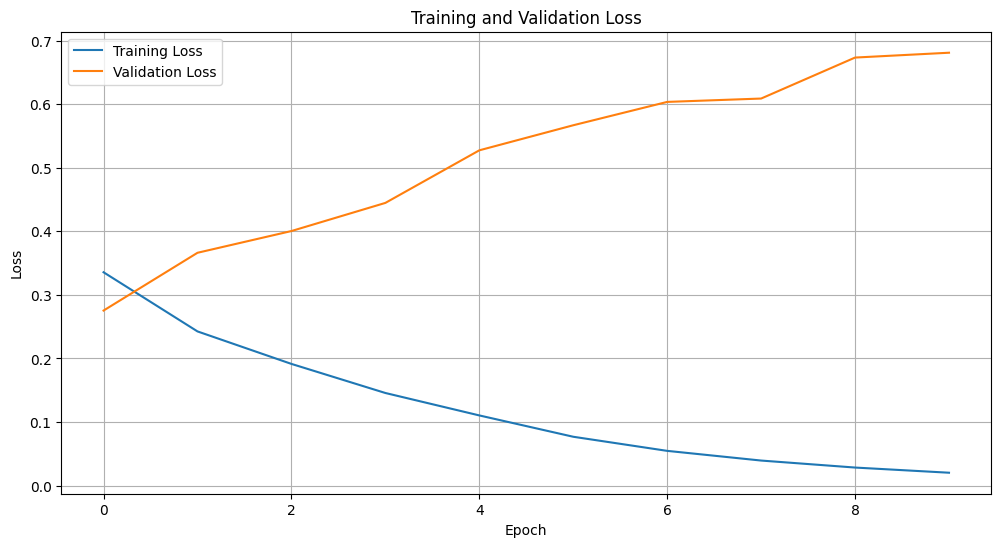

In [18]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot([stat['train_loss'] for stat in training_stats], label='Training Loss')
plt.plot([stat['val_loss'] for stat in training_stats], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_curves.png')
plt.show()

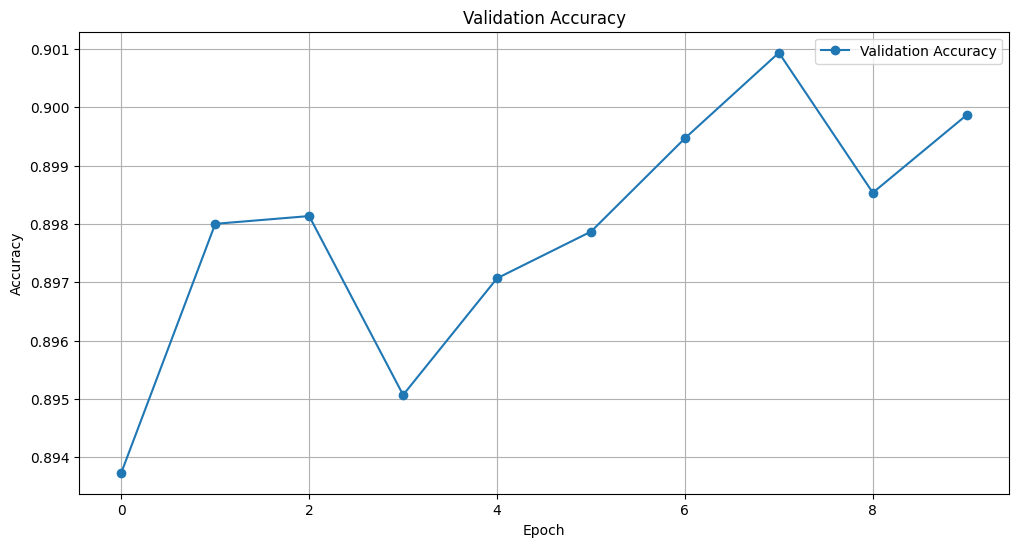

In [19]:
# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.plot([stat['val_accuracy'] for stat in training_stats], label='Validation Accuracy', marker='o')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_curve.png')
plt.show()

In [30]:
all_preds = []
all_labels = []
def evaluate_test_set(model, test_dataloader, device):
    model.eval()
    
    for batch in tqdm(test_dataloader):
        # Unpack the batch and move to device
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # No gradient calculation needed
        with torch.no_grad():
            # Forward pass
            outputs = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask
            )
            
            logits = outputs.logits
            
            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            
            # Store predictions and true labels
            preds = np.argmax(logits, axis=1)
            all_preds.extend(preds)
            all_labels.extend(label_ids)
    
    # Evaluate predictions
    
    accuracy, precision, recall, f1 = evaluate_model(all_labels, all_preds)
    
    return accuracy, precision, recall, f1

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_test_set(model, test_dataloader, device)

# Save the model
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_tokenizer')

100%|██████████| 469/469 [00:54<00:00,  8.63it/s]


Accuracy: 0.9051
Precision: 0.9051
Recall: 0.9051
F1 Score: 0.9051

Confusion Matrix:
[[3400  350]
 [ 362 3388]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3750
           1       0.91      0.90      0.90      3750

    accuracy                           0.91      7500
   macro avg       0.91      0.91      0.91      7500
weighted avg       0.91      0.91      0.91      7500



('./sentiment_tokenizer/tokenizer_config.json',
 './sentiment_tokenizer/special_tokens_map.json',
 './sentiment_tokenizer/vocab.json',
 './sentiment_tokenizer/merges.txt',
 './sentiment_tokenizer/added_tokens.json')

In [26]:
import torch
from tqdm import tqdm

def calculate_accuracy(dataloader, model, device):
    model.eval()  # Set the model to evaluation mode
    
    correct_predictions = 0
    total_examples = 0
    
    for batch in tqdm(dataloader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():
            outputs = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask
            )
            
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            correct_predictions += (preds == b_labels).sum().item()
            total_examples += b_labels.size(0)
    
    accuracy = correct_predictions / total_examples
    return accuracy

# Calculate training accuracy
train_accuracy = calculate_accuracy(train_dataloader, model, device)
print(f"Training Accuracy: {train_accuracy:.4f}")

100%|██████████| 2188/2188 [04:06<00:00,  8.86it/s]

Training Accuracy: 0.9989


In [29]:
def predict_sentiment(text, model, tokenizer, device):
    # Preprocess the text
    processed_text = preprocess_text(text)
    
    # Tokenize
    encoded_dict = tokenizer.encode_plus(
        processed_text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    
    # Move to device
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)
    
    # Set model to evaluation mode
    model.eval()
    
    # Get prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
    
    # Get prediction class
    prediction = torch.argmax(logits, dim=1).item()
    
    # Map prediction to sentiment
    sentiment_map = {0: 'Negative', 1: 'positive'}
    sentiment = sentiment_map[prediction]
    
    return sentiment

# Example usage
sample_texts = [
    "I absolutely love this product! It's amazing!",
    "This is the worst experience I've ever had."
]

for text in sample_texts:
    sentiment = predict_sentiment(text, model, tokenizer, device)
    print(f"Text: {text}")
    print(f"Sentiment: {sentiment}\n")

Text: I absolutely love this product! It's amazing!
Sentiment: positive

Text: This is the worst experience I've ever had.
Sentiment: Negative



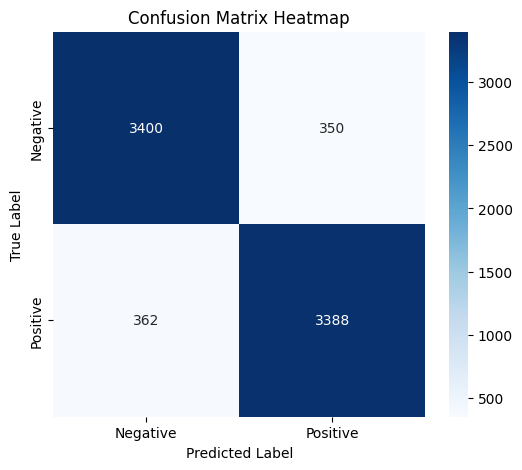

In [31]:
import seaborn as sns
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative',  'Positive'],
            yticklabels=['Negative',  'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.savefig("confusion_matrix_heatmap.png")
plt.show()